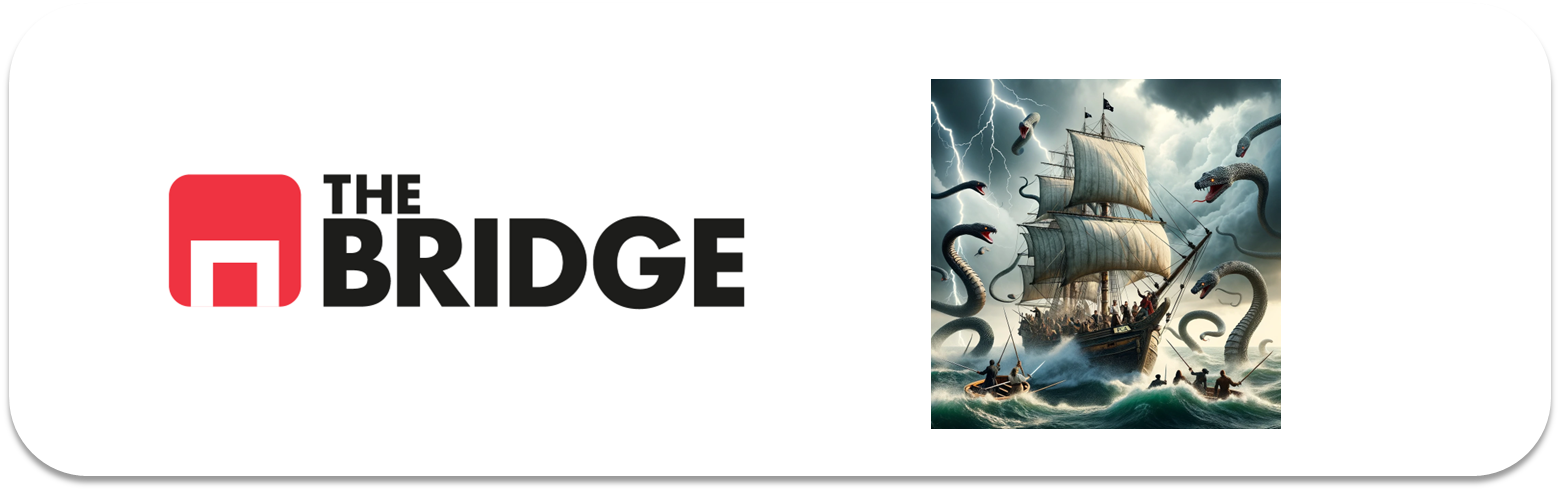

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import toolbox_ML as tb
import bootcampviztools as bt

pd.options.mode.copy_on_write = True

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


#### Cargar los datos

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [4]:
tb.describe_df(df)

COL_N,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.75,0.0,0.0,0.0,0.0,1.41
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

**Convertir a categóricas**

In [7]:
cols_numberOf = [col for col in df.columns if col.startswith("NumberOfTime")]

for col in cols_numberOf:
    print(df[col].value_counts().sort_index(),"\n")

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
7        1
8        2
98      10
Name: count, dtype: int64 

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
6         6
7         3
8         3
9         1
10        1
13        1
98       10
Name: count, dtype: int64 

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
5         4
11        1
98       10
Name: count, dtype: int64 



Reemplazo los 98 por nulos y luego elimino esas filas:

In [8]:
for col in cols_numberOf:
    df[col] = df[col].replace(98, np.nan)

df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11806 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11806 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11806 non-null  float64
 2   age                                   11806 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11806 non-null  float64
 4   DebtRatio                             11806 non-null  float64
 5   MonthlyIncome                         11806 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11806 non-null  int64  
 7   NumberOfTimes90DaysLate               11806 non-null  float64
 8   NumberRealEstateLoansOrLines          11806 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11806 non-null  float64
 10  NumberOfDependents                    11806 non-null  float64
dtypes: float64(7), int64

Ahora sí simplifico en:
- 0 veces --> 0
- 1 vez --> 1
- más de 1 vez --> 2

In [10]:
df_copy = df.copy()

In [11]:
for col in cols_numberOf:
    for i in df[col].unique():
        if i != 0 and i != 1:
            df[col] = df[col].replace(i, 2)

In [12]:
for col in cols_numberOf:
    print(df[col].value_counts().sort_index(),"\n")

NumberOfTime30-59DaysPastDueNotWorse
0.0    9818
1.0    1354
2.0     634
Name: count, dtype: int64 

NumberOfTimes90DaysLate
0.0    11156
1.0      394
2.0      256
Name: count, dtype: int64 

NumberOfTime60-89DaysPastDueNotWorse
0.0    11206
1.0      478
2.0      122
Name: count, dtype: int64 



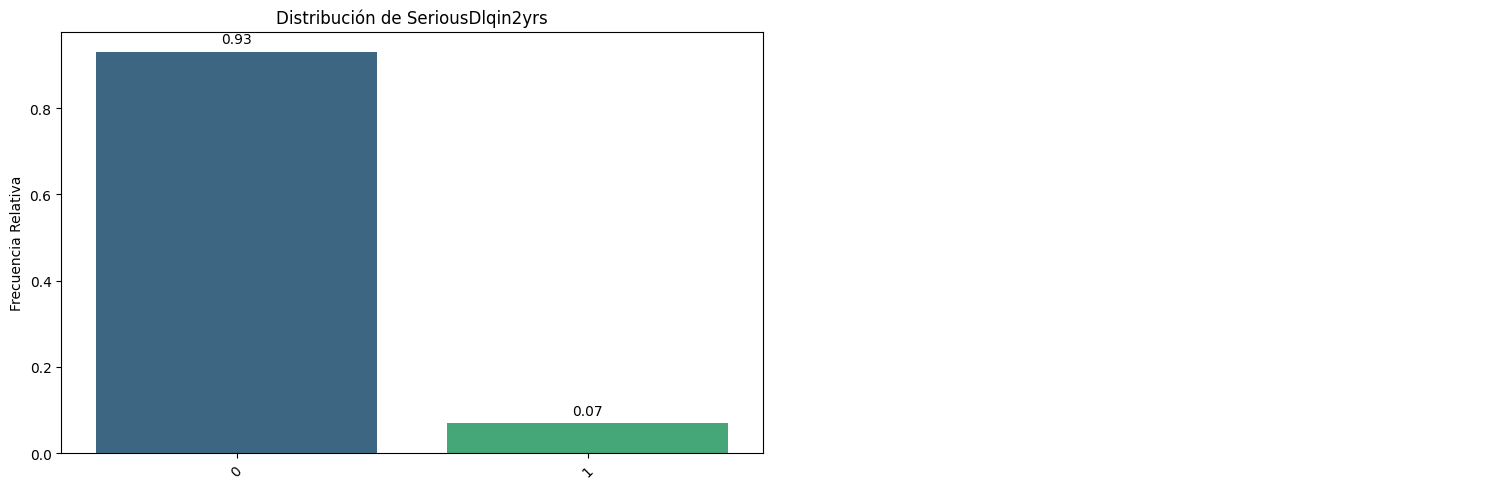

In [13]:
# Análisis del target
target = "SeriousDlqin2yrs"

bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

Está muy desbalanceado.

#### División Train y Test

In [14]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42, stratify= df[target])

In [15]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
features_cat = [col for col in df.columns if col.startswith("NumberOfTime")]
features_cat.append("NumberOfDependents")
print(features_cat)

features_num = [col for col in df.columns if col not in features_cat and col != target]
print(features_num)

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']


In [17]:
features = features_cat + features_num

In [18]:
X_train = train_set[features].copy()
y_train = train_set[target]

X_test = test_set[features].copy()
y_test = test_set[target]

#### Mini-EDA

**1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.**

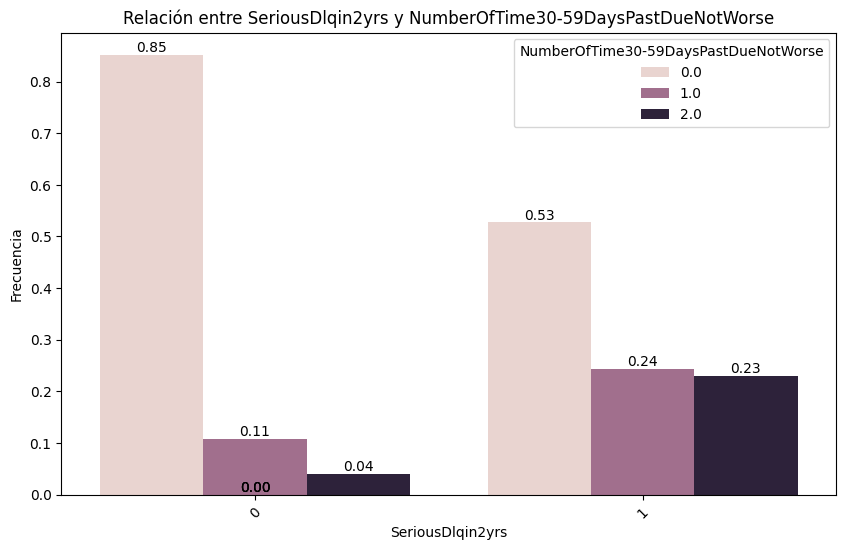

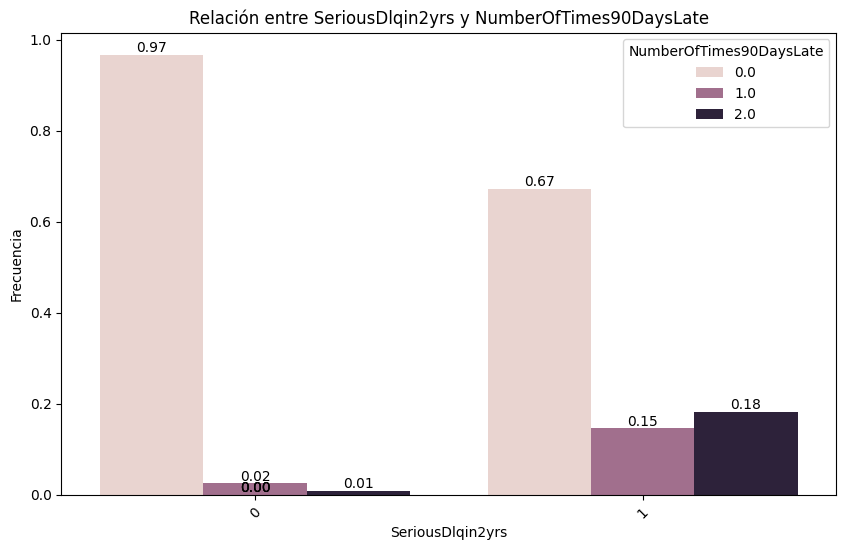

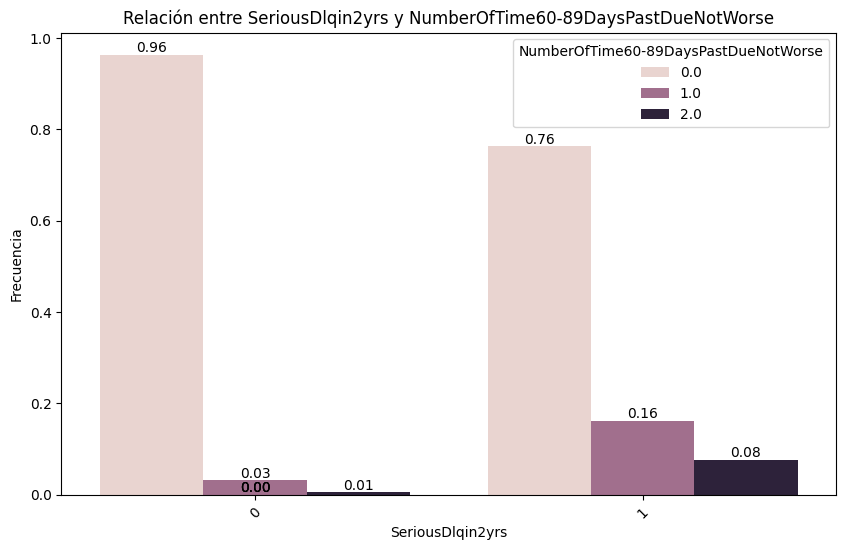

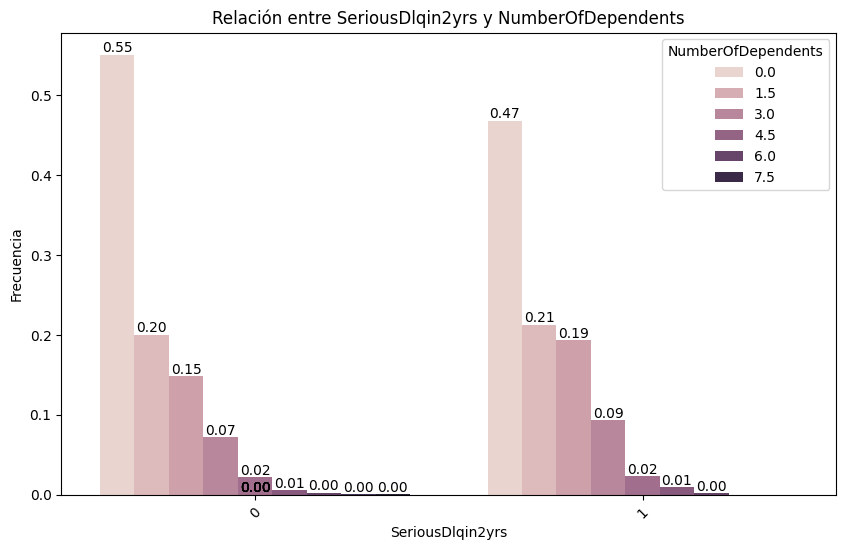

In [19]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)

La única que tiene distribución similar es NumberOfDependents, la descarto:

In [20]:
features_cat_1 = features_cat.copy()

In [21]:
features_cat_1.remove("NumberOfDependents")

In [22]:
features_cat_1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

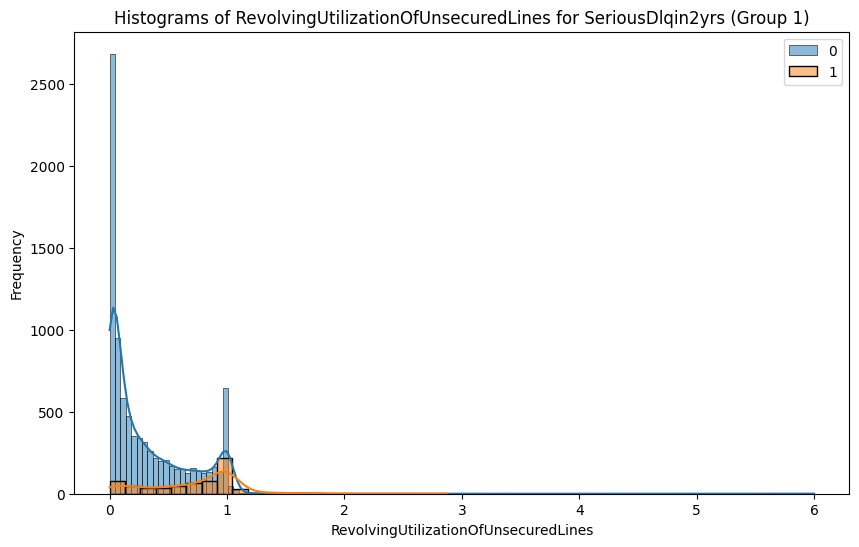

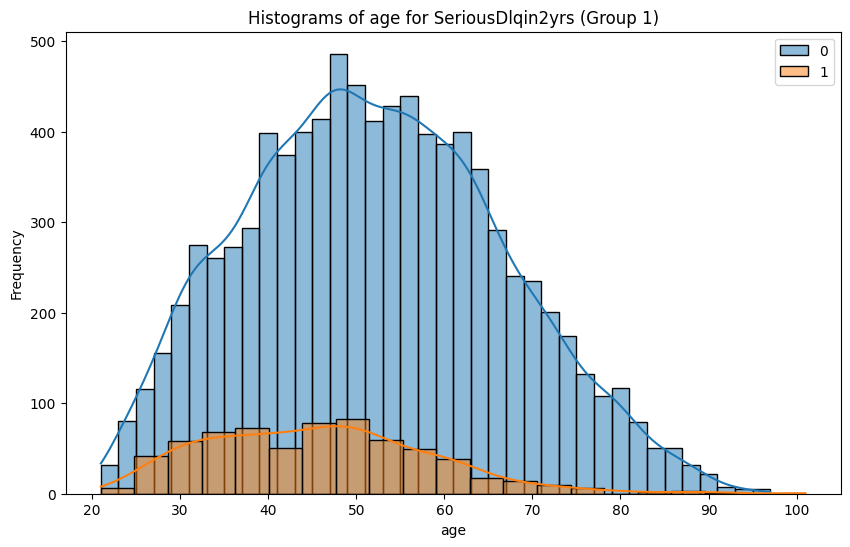

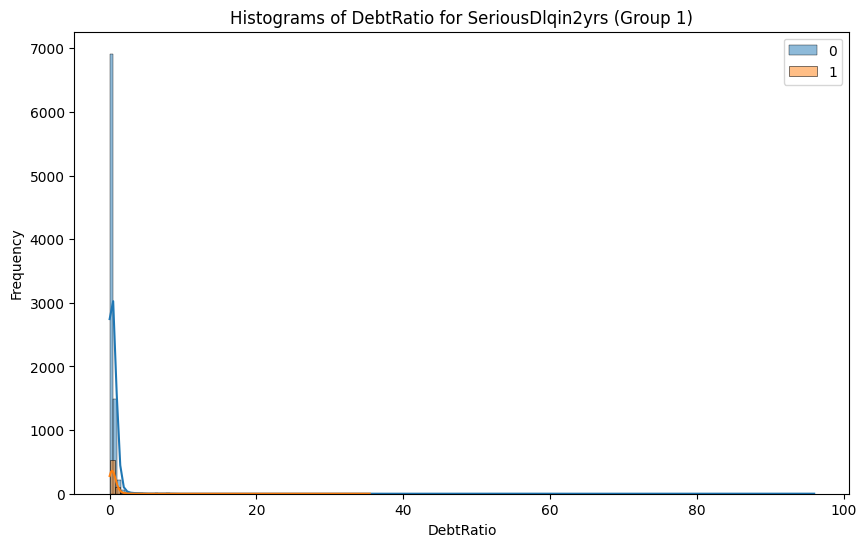

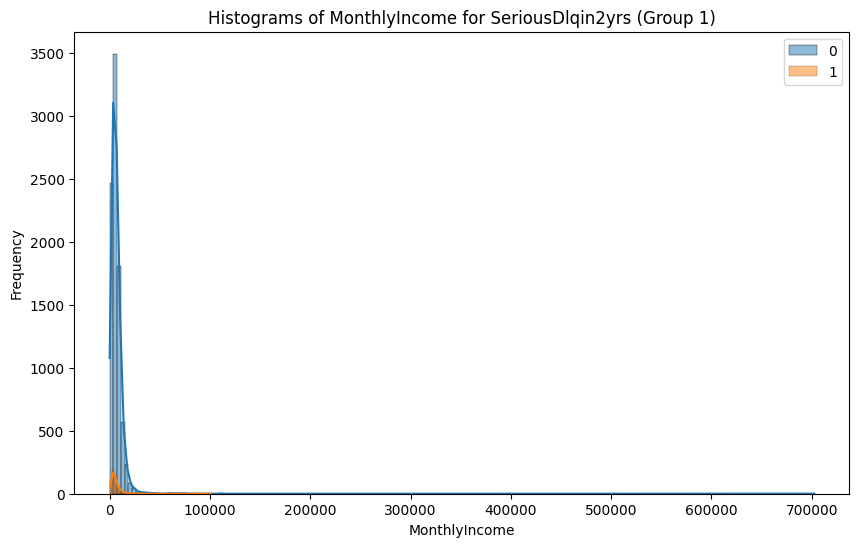

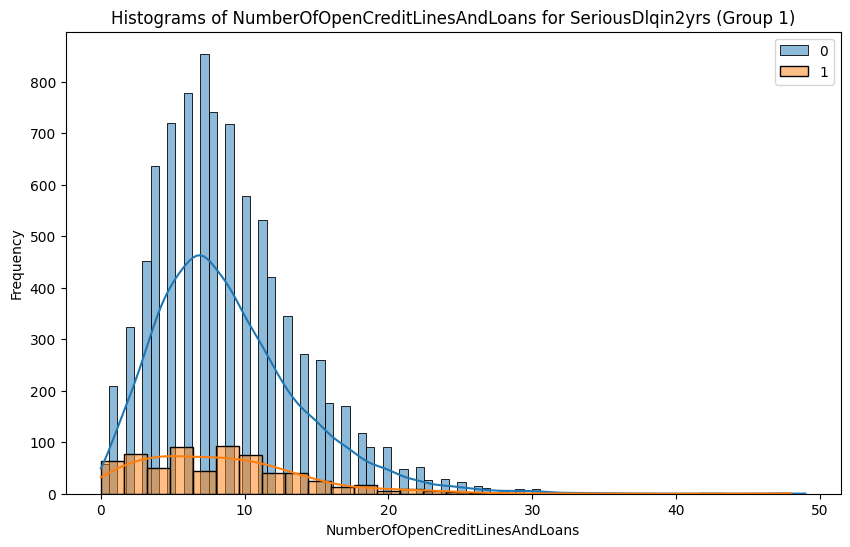

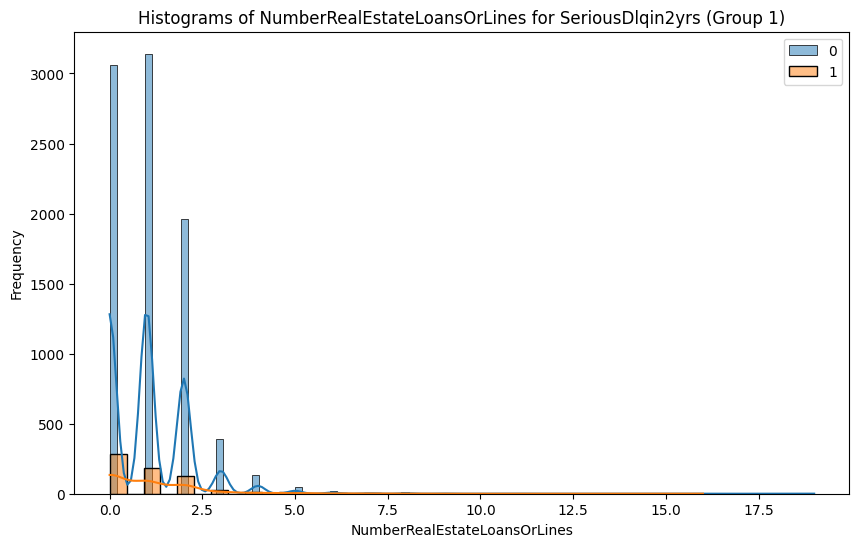

In [23]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, target, col, group_size= 2)

Visualmente no se aprecia mucho

In [24]:
# Correlaciones con target
corr = train_set[features_num + [target]].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.279900
age                                     0.108690
NumberOfOpenCreditLinesAndLoans         0.026978
MonthlyIncome                           0.022255
DebtRatio                               0.003310
NumberRealEstateLoansOrLines            0.000306
Name: SeriousDlqin2yrs, dtype: float64

De las numéricas las más relevantes son "RevolvingUtilizationOfUnsecuredLines" y "age", y en menor medida también se podría considerar "NumberOfOpenCreditLinesAndLoans" y "MonthlyIncome".

In [25]:
umbral = 0.02

features_num_1 = serie_corr[serie_corr >= umbral].index.to_list()
features_num_1

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'SeriousDlqin2yrs']

In [26]:
features_num_1.remove(target)

In [27]:
features_1 = features_cat_1 + features_num_1

In [28]:
X_train_visual = X_train[features_num_1]
X_test_visual = X_test[features_num_1]

**2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features**

In [29]:
features_num_2 = features_num.copy()

In [36]:
X_train_num = X_train[features_num]

selector = SelectKBest(f_classif, k = 6)
selector.fit(X_train_num, y_train)
features_num_2 = selector.get_feature_names_out()

print(features_num_2)
print("\n", "p_valores:")
print(selector.pvalues_)

['RevolvingUtilizationOfUnsecuredLines' 'age' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines']

 p_valores:
[1.57066814e-169 3.22898152e-026 7.47713833e-001 3.05626235e-002
 8.74632585e-003 9.76309564e-001]


Selecciona las que tienen p-valor $< 0.05$:

In [38]:
alpha = 0.05
features_num_2 = []

for feature, p_value in zip(features_num, selector.pvalues_):
    if p_value < 0.05:
        features_num_2.append(feature)

features_num_2

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [39]:
X_train_kbest = pd.DataFrame(selector.transform(X_train_num),
                             columns= selector.get_feature_names_out())
X_train_kbest = X_train_kbest[features_num_2]
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.525514,79.0,3936.0,3.0
1,0.000000,66.0,18694.0,16.0
2,0.386884,68.0,18700.0,9.0
3,0.001080,59.0,4166.0,6.0
4,0.000939,70.0,1906.0,5.0
...,...,...,...,...
9439,0.555364,63.0,4000.0,15.0
9440,0.019448,50.0,1500.0,3.0
9441,0.324218,41.0,8000.0,17.0
9442,0.877060,48.0,6945.0,7.0


In [40]:
X_test_num = X_test[features_num]

X_test_kbest = pd.DataFrame(selector.transform(X_test_num),
                             columns= selector.get_feature_names_out())
X_test_kbest = X_test_kbest[features_num_2]
X_test_kbest

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,1.000000,23.0,1000.0,1.0
1,0.087525,58.0,12509.0,4.0
2,0.834166,59.0,4716.0,11.0
3,0.027884,52.0,8176.0,5.0
4,0.102684,66.0,10500.0,10.0
...,...,...,...,...
2357,0.132560,46.0,8975.0,11.0
2358,0.612599,51.0,7183.0,14.0
2359,0.133705,56.0,7600.0,6.0
2360,1.000000,24.0,2745.0,2.0


**3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)**

In [41]:
rf_selector = RandomForestClassifier(max_depth = 5, random_state = 42)

In [42]:
rf_selector.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [43]:
selector_model = SelectFromModel(estimator= rf_selector, threshold= "median")

In [44]:
selector_model.fit(X_train, y_train)

,"estimator estimator: objectThe base estimator from which the transformer is built.This can be both a fitted (if ``prefit`` is set to True)or a non-fitted estimator. The estimator should have a``feature_importances_`` or ``coef_`` attribute after fitting.Otherwise, the ``importance_getter`` parameter should be used.",RandomForestC...ndom_state=42)
,"threshold threshold: str or float, default=NoneThe threshold value to use for feature selection. Features whoseabsolute importance value is greater or equal are kept while the othersare discarded. If ""median"" (resp. ""mean""), then the ``threshold`` valueis the median (resp. the mean) of the feature importances. A scalingfactor (e.g., ""1.25*mean"") may also be used. If None and if theestimator has a parameter penalty set to l1, either explicitlyor implicitly (e.g, Lasso), the threshold used is 1e-5.Otherwise, ""mean"" is used by default.",'median'
,"prefit prefit: bool, default=FalseWhether a prefit model is expected to be passed into the constructordirectly or not.If `True`, `estimator` must be a fitted estimator.If `False`, `estimator` is fitted and updated by calling`fit` and `partial_fit`, respectively.",False
,"norm_order norm_order: non-zero int, inf, -inf, default=1Order of the norm used to filter the vectors of coefficients below``threshold`` in the case where the ``coef_`` attribute of theestimator is of dimension 2.",1
,"max_features max_features: int, callable, default=NoneThe maximum number of features to select.- If an integer, then it specifies the maximum number of features to allow.- If a callable, then it specifies how to calculate the maximum number of features allowed. The callable will receive `X` as input: `max_features(X)`.- If `None`, then all features are kept.To only select based on ``max_features``, set ``threshold=-np.inf``... versionadded:: 0.20.. versionchanged:: 1.1 `max_features` accepts a callable.",None
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a ``coef_``attribute or ``feature_importances_`` attribute of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case of:class:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of t

In [45]:
features_3 = selector_model.get_feature_names_out()
features_3

array(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse',
       'RevolvingUtilizationOfUnsecuredLines', 'age'], dtype=object)

In [103]:
features_cat_3 = [col for col in features_3 if col.startswith("NumberOf")]
print(features_cat_3)

features_num_3 = [col for col in features_3 if col not in features_cat_3]
features_num_3

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


['RevolvingUtilizationOfUnsecuredLines', 'age']

In [46]:
X_train_model = pd.DataFrame(selector_model.transform(X_train.copy()), columns = selector_model.get_feature_names_out())
X_train_model

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age
0,0.0,0.0,0.0,0.525514,79.0
1,0.0,0.0,0.0,0.000000,66.0
2,0.0,0.0,0.0,0.386884,68.0
3,0.0,0.0,0.0,0.001080,59.0
4,0.0,0.0,0.0,0.000939,70.0
...,...,...,...,...,...
9439,0.0,0.0,0.0,0.555364,63.0
9440,0.0,0.0,0.0,0.019448,50.0
9441,0.0,0.0,0.0,0.324218,41.0
9442,0.0,0.0,1.0,0.877060,48.0


In [47]:
X_test_model = pd.DataFrame(selector_model.transform(X_test.copy()), columns = selector_model.get_feature_names_out())
X_test_model

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age
0,0.0,0.0,0.0,1.000000,23.0
1,0.0,0.0,0.0,0.087525,58.0
2,0.0,0.0,0.0,0.834166,59.0
3,0.0,0.0,0.0,0.027884,52.0
4,0.0,0.0,0.0,0.102684,66.0
...,...,...,...,...,...
2357,0.0,0.0,0.0,0.132560,46.0
2358,0.0,0.0,0.0,0.612599,51.0
2359,0.0,0.0,0.0,0.133705,56.0
2360,0.0,0.0,0.0,1.000000,24.0


**4. Selección de las mejores features empleando RFE.**

In [48]:
rf_RFE = RandomForestClassifier(max_depth= 5, random_state= 42)

In [49]:
rfe = RFE(estimator= rf_RFE, n_features_to_select= 6, step= 1)
rfe.fit(X_train, y_train)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",RandomForestC...ndom_state=42)
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",6
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",1
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0


In [50]:
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features).sort_values("ranking")

,ranking
NumberOfTime30-59DaysPastDueNotWorse,1
NumberOfTimes90DaysLate,1
NumberOfTime60-89DaysPastDueNotWorse,1
RevolvingUtilizationOfUnsecuredLines,1
age,1
NumberOfOpenCreditLinesAndLoans,1
DebtRatio,2
MonthlyIncome,3
NumberRealEstateLoansOrLines,4
NumberOfDependents,5


In [54]:
features_4 = rfe.get_feature_names_out()
features_4

array(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfOpenCreditLinesAndLoans'], dtype=object)

In [105]:
features_cat_4 = [col for col in features_4 if col.startswith("NumberOfTime")]
print(features_cat_4)

features_num_4 = [col for col in features_4 if col not in features_cat_4]
features_num_4

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans']

In [55]:
X_train_rfe = pd.DataFrame(rfe.transform(X_train.copy()), columns = features_4)
X_train_rfe

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans
0,0.0,0.0,0.0,0.525514,79.0,3.0
1,0.0,0.0,0.0,0.000000,66.0,16.0
2,0.0,0.0,0.0,0.386884,68.0,9.0
3,0.0,0.0,0.0,0.001080,59.0,6.0
4,0.0,0.0,0.0,0.000939,70.0,5.0
...,...,...,...,...,...,...
9439,0.0,0.0,0.0,0.555364,63.0,15.0
9440,0.0,0.0,0.0,0.019448,50.0,3.0
9441,0.0,0.0,0.0,0.324218,41.0,17.0
9442,0.0,0.0,1.0,0.877060,48.0,7.0


In [56]:
X_test_rfe = pd.DataFrame(rfe.transform(X_test.copy()), columns = features_4)
X_test_rfe

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans
0,0.0,0.0,0.0,1.000000,23.0,1.0
1,0.0,0.0,0.0,0.087525,58.0,4.0
2,0.0,0.0,0.0,0.834166,59.0,11.0
3,0.0,0.0,0.0,0.027884,52.0,5.0
4,0.0,0.0,0.0,0.102684,66.0,10.0
...,...,...,...,...,...,...
2357,0.0,0.0,0.0,0.132560,46.0,11.0
2358,0.0,0.0,0.0,0.612599,51.0,14.0
2359,0.0,0.0,0.0,0.133705,56.0,6.0
2360,0.0,0.0,0.0,1.000000,24.0,2.0


**5. Selección de las mejores features empleando SFS.**

In [58]:
rf_SFS = RandomForestClassifier(max_depth= 5, random_state= 42)

In [60]:
sfs = SequentialFeatureSelector(estimator= rf_SFS, n_features_to_select= 6, cv = 5, scoring= "balanced_accuracy")
sfs.fit(X_train, y_train)

,estimator estimator: estimator instanceAn unfitted estimator.,RandomForestC...ndom_state=42)
,"n_features_to_select n_features_to_select: ""auto"", int or float, default=""auto""If `""auto""`, the behaviour depends on the `tol` parameter:- if `tol` is not `None`, then features are selected while the score change does not exceed `tol`.- otherwise, half of the features are selected.If integer, the parameter is the absolute number of features to select.If float between 0 and 1, it is the fraction of features to select... versionadded:: 1.1 The option `""auto""` was added in version 1.1... versionchanged:: 1.3 The default changed from `""warn""` to `""auto""` in 1.3.",6
,"tol tol: float, default=NoneIf the score is not incremented by at least `tol` between twoconsecutive feature additions or removals, stop adding or removing.`tol` can be negative when removing features using `direction=""backward""`.`tol` is required to be strictly positive when doing forward selection.It can be useful to reduce the number of features at the cost of a smalldecrease in the score.`tol` is enabled only when `n_features_to_select` is `""auto""`... versionadded:: 1.1",None
,"direction direction: {'forward', 'backward'}, default='forward'Whether to perform forward selection or backward selection.",'forward'
,"scoring scoring: str or callable, default=NoneScoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)`` that returns a single value. See :ref:`scoring_callable` for details.- `None`: the `estimator`'s :ref:`default evaluation criterion ` is used.",'balanced_accuracy'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. In all othercases, :class:`~sklearn.model_selection.KFold` is used. These splittersare instantiated with `shuffle=False` so the splits will be the sameacross calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",5
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel. When evaluating a new feature toadd or remove, the cross-validation procedure is parallel over thefolds.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [62]:
features_5 = sfs.get_feature_names_out()
features_5

array(['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'],
      dtype=object)

In [107]:
features_cat_5 = [col for col in features_5 if col.startswith("NumberOfTime")]
print(features_cat_5)

features_num_5 = [col for col in features_5 if col not in features_cat_5]
features_num_5

['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

In [63]:
X_train_sfs = pd.DataFrame(sfs.transform(X_train.copy()), columns = features_5)
X_train_sfs

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
0,0.0,0.0,0.525514,79.0,3.0,1.0
1,0.0,0.0,0.000000,66.0,16.0,5.0
2,0.0,0.0,0.386884,68.0,9.0,1.0
3,0.0,0.0,0.001080,59.0,6.0,1.0
4,0.0,0.0,0.000939,70.0,5.0,0.0
...,...,...,...,...,...,...
9439,0.0,0.0,0.555364,63.0,15.0,1.0
9440,0.0,0.0,0.019448,50.0,3.0,1.0
9441,0.0,0.0,0.324218,41.0,17.0,1.0
9442,0.0,1.0,0.877060,48.0,7.0,0.0


In [64]:
X_test_sfs = pd.DataFrame(sfs.transform(X_test.copy()), columns = features_5)
X_test_sfs

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
0,0.0,0.0,1.000000,23.0,1.0,0.0
1,0.0,0.0,0.087525,58.0,4.0,1.0
2,0.0,0.0,0.834166,59.0,11.0,2.0
3,0.0,0.0,0.027884,52.0,5.0,2.0
4,0.0,0.0,0.102684,66.0,10.0,1.0
...,...,...,...,...,...,...
2357,0.0,0.0,0.132560,46.0,11.0,2.0
2358,0.0,0.0,0.612599,51.0,14.0,3.0
2359,0.0,0.0,0.133705,56.0,6.0,2.0
2360,0.0,0.0,1.000000,24.0,2.0,0.0


**6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.**

In [79]:
dicc = {}
for col in features:
    dicc[col] = 0

df_votos = pd.DataFrame(data = dicc.values(), columns= ["Votos"], index = dicc.keys())
df_votos

,Votos
NumberOfTime30-59DaysPastDueNotWorse,0
NumberOfTimes90DaysLate,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberRealEstateLoansOrLines,0


In [85]:
df_votos.loc["age"]

Votos    0
Name: age, dtype: int64

In [86]:
lista = [features_1, features_num_2, features_3, features_4, features_5]

for lista_features in lista:
    for feature in lista_features:
        df_votos.loc[feature] += 1

In [91]:
df_votos.sort_values(by = "Votos", ascending= False)

,Votos
RevolvingUtilizationOfUnsecuredLines,5
age,5
NumberOfTime60-89DaysPastDueNotWorse,4
NumberOfTimes90DaysLate,4
NumberOfOpenCreditLinesAndLoans,4
NumberOfTime30-59DaysPastDueNotWorse,3
MonthlyIncome,2
NumberRealEstateLoansOrLines,1
NumberOfDependents,0
DebtRatio,0


In [95]:
features_6 = df_votos.sort_values(by = "Votos", ascending= False)[:6].index
features_6

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse'],
      dtype='object')

In [108]:
features_cat_6 = [col for col in features_6 if col.startswith("NumberOfTime")]
print(features_cat_6)

features_num_6 = [col for col in features_6 if col not in features_cat_6]
features_num_6

['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse']


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans']

In [97]:
X_train_votos = X_train[features_6].copy()
X_test_votos = X_test[features_6].copy()

##### Tratamiento de features

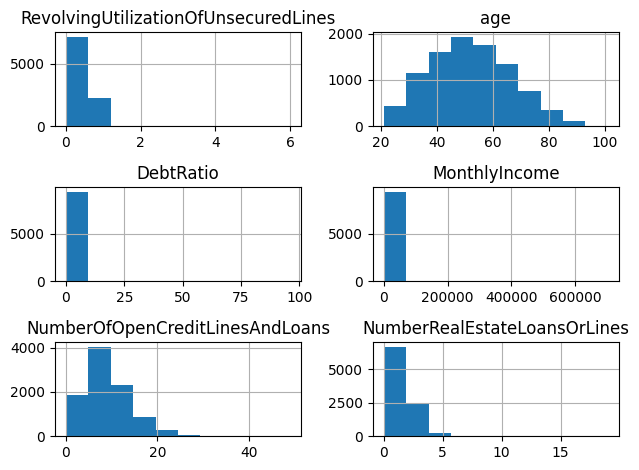

In [110]:
train_set[features_num].hist()
plt.tight_layout()

In [111]:
# 1. Visual
X_train_visual_scaled = X_train_visual.copy()
X_test_visual_scaled = X_test_visual.copy()

# 2. Anova
X_train_kbest_scaled = X_train_kbest.copy()
X_test_kbest_scaled = X_test_kbest.copy()

# 3. SelectFromModel
X_train_model_scaled = X_train_model.copy()
X_test_model_scaled = X_test_model.copy()

# 4. RFE
X_train_rfe_scaled = X_train_rfe.copy()
X_test_rfe_scaled = X_test_rfe.copy()

# 5. SFS
X_train_sfs_scaled = X_train_sfs.copy()
X_test_sfs_scaled = X_test_sfs.copy()

# 6. Hard-voting
X_train_votos_scaled = X_train_votos.copy()
X_test_votos_scaled = X_test_votos.copy()

In [112]:
X_train_scaled_lista = [X_train_visual_scaled, X_train_kbest_scaled, X_train_model_scaled, X_train_rfe_scaled, X_train_sfs_scaled, X_train_votos_scaled]
X_test_scaled_lista = [X_test_visual_scaled, X_test_kbest_scaled, X_test_model_scaled, X_test_rfe_scaled, X_test_sfs_scaled, X_test_votos_scaled]

lista_features_num = [features_num_1, features_num_2, features_num_3, features_num_4, features_num_5, features_num_6]

In [113]:
for X_train_scaled, X_test_scaled, list_features in zip(X_train_scaled_lista, X_test_scaled_lista, lista_features_num):
    for col in list_features:
        if col != "age":
            X_train_scaled[col] = np.log(X_train_scaled[col] + 1)
            X_test_scaled[col] = np.log(X_test_scaled[col] + 1)

##### Escalado

In [114]:
scaler = StandardScaler()

In [115]:
for X_train_scaled, X_test_scaled, list_features in zip(X_train_scaled_lista, X_test_scaled_lista, lista_features_num):
    X_train_scaled[list_features] = scaler.fit_transform(X_train_scaled[list_features])
    X_test_scaled[list_features] = scaler.transform(X_test_scaled[list_features])

##### 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [98]:
# Baseline --> Random Forest
rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [100]:
print(classification_report(y_train, rf_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8786
           1       0.84      0.16      0.27       658

    accuracy                           0.94      9444
   macro avg       0.89      0.58      0.62      9444
weighted avg       0.93      0.94      0.92      9444



**Comparativa**

In [117]:
print("1. Visualización")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_visual, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_visual_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

1. Visualización
Para Logistic: 0.5018802334191534
Para RandomF: 0.5028200884329324
Para XGBoost: 0.5312658014143555
Para LightGBM: 0.521380354483341


In [128]:
print("2. KBest")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_kbest, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_kbest_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

2. KBest
Para Logistic: 0.5018802334191534
Para RandomF: 0.5028200884329324
Para XGBoost: 0.5312658014143555
Para LightGBM: 0.521380354483341


In [123]:
print("3. SelectFromModel")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_model, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_model_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

3. SelectFromModel
Para Logistic: 0.5833761438945632
Para RandomF: 0.5734867840070093
Para XGBoost: 0.5902144567316358
Para LightGBM: 0.5795150476303674


In [ ]:
print("4. RFE")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_rfe, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_rfe_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

4. RFE
Para Logistic: 0.5827893137260597
Para RandomF: 0.564331770667922
Para XGBoost: 0.5939510090943905
Para LightGBM: 0.59066343951488


In [126]:
print("5. SFS")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_sfs, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_sfs_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

5. SFS
Para Logistic: 0.5844925275184646
Para RandomF: 0.5660465505024272
Para XGBoost: 0.5999148046836538
Para LightGBM: 0.5853247614272659


In [127]:
print("6. Hard-Voting")
modelos = ["Logistic","RandomF","XGBoost","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0]:
        metrica = np.mean(cross_val_score(modelo, X_train_votos, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_votos_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

6. Hard-Voting
Para Logistic: 0.5827893137260597
Para RandomF: 0.5655624109512255
Para XGBoost: 0.5939510090943905
Para LightGBM: 0.59066343951488



##### 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

El que mejor ha salido ha sido XGBoost con la selección donde se ha empleado SFS.

In [130]:
param_grid= {
    "n_estimators": [100, 200],
    "learning_rate": [0.1, 0.5, 1],
    "max_depth": [5, 10, 15],
    "colsample_bytree": [0.5, 1],
    "subsample": [0.3, 0.6, 1]
}

xgb = XGBClassifier(verbose = -1)

xgb_grid = GridSearchCV(xgb,
                        param_grid = param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy",
                        n_jobs = -1)

xgb_grid.fit(X_train_sfs, y_train)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:24:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.5, 1], 'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'n_estimators': [100, 200], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each 

In [131]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.3}

In [132]:
xgb_grid.best_score_

np.float64(0.6144944143927966)

In [133]:
print(classification_report(y_test, xgb_grid.best_estimator_.predict(X_test_sfs)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2197
           1       0.24      0.27      0.25       165

    accuracy                           0.89      2362
   macro avg       0.59      0.60      0.60      2362
weighted avg       0.90      0.89      0.89      2362



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.